# Tomek Links


Tomek links are 2 samples from a different class, which are nearest neighbours to each other. In other words, if 2 observations are nearest neighbours, and from a different class, they are Tomek Links.

This procedures removes either the sample from the majority class if it is a Tomek Link, or alternatively, both observations, the one from the majority and the one from the minority class.

====

- **Criteria for data exclusion**: Samples are Tomek Links
- **Final Dataset size**: varies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks

## Create data

We will create data where the classes have different degrees of separateness.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [3]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

## Undersample with Tomek Links

https://imbalanced-learn.org/stable/generated/imblearn.under_sampling.TomekLinks.html

### Well separated classes

In [4]:
# create data

X, y = make_data(sep=2)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [5]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [6]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((994, 2), (994,))

In [7]:
# number of minority class observations

y.value_counts()

0    983
1     17
dtype: int64

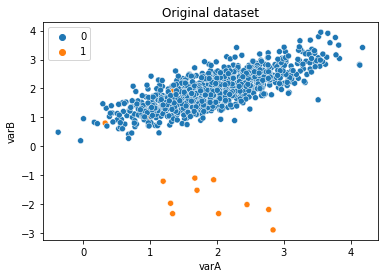

In [8]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

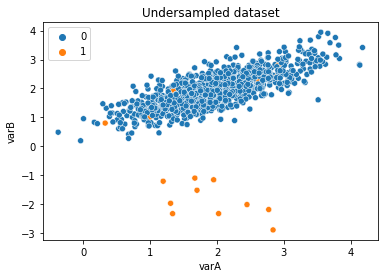

In [9]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

### Partially separated classes

In [10]:
# create data
X, y = make_data(sep=0.5)

# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X, y)

In [11]:
# original data

X.shape, y.shape

((1000, 2), (1000,))

In [12]:
# undersampled data

X_resampled.shape, y_resampled.shape

((988, 2), (988,))

Note that more samples were excluded in the final training set, compared to the previous case where classes were more separated. This is because there are more Tomek Links, as the classes are now not so separated.

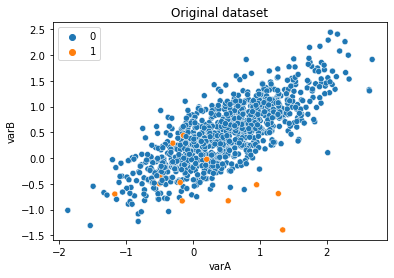

In [13]:
sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

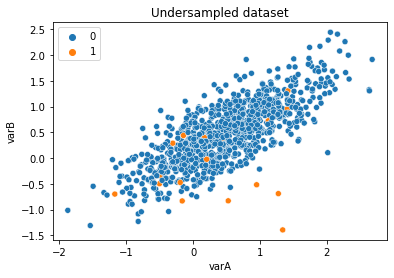

In [14]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()

**HOMEWORK**

- Remove both observations from the Tomek Link and compare the sizes of the undersampled datasets and the distribution of the observations in the plots.

===


## Tomek Links

### Real data - Performance comparison

Does it work well with real datasets? 

Well, it will depend on the dataset, so we need to try and compare the models built on the whole dataset, and that built on the undersampled dataset.

In [18]:
# load data
# only a few observations to speed the computaton

data = pd.read_csv('../kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
43463,57.14,28.33,-0.66,-26.0,2.0,668.3,0.07,-1.17,-25.0,-43.0,...,742.5,-0.98,0.98,6.0,-31.0,158.3,0.63,0.43,0.59,-1
129720,49.68,24.68,-1.04,-14.5,27.0,1232.2,-0.29,-1.06,-10.5,-54.0,...,1612.8,-2.41,-0.44,5.0,-47.0,42.9,1.73,0.18,-0.04,-1
129961,81.29,23.53,0.06,-19.0,2.0,848.5,0.35,1.15,22.5,-74.0,...,686.5,0.21,0.74,11.0,-55.0,502.4,-0.46,0.26,0.15,-1
7166,78.47,26.02,-1.97,-50.5,49.5,1278.2,-0.53,1.06,4.0,-69.0,...,1472.5,-1.28,3.13,11.0,-57.0,306.5,0.81,0.23,0.88,-1
108861,99.43,27.59,1.20,-16.5,61.0,3045.5,-0.36,1.64,-9.0,-102.5,...,3945.9,-1.27,0.21,-5.0,-61.0,908.3,-0.36,0.44,0.43,-1


In [19]:
# imbalanced target
data.target.value_counts() / len(data)

-1    0.9904
 1    0.0096
Name: target, dtype: float64

In [20]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((7000, 74), (3000, 74))

In [21]:
# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='auto',  # undersamples only the majority class
    n_jobs=4)  # I have 4 cores in my laptop

X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

In [22]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((6994, 74), (6994,))

The under-sampled data set is very similar to the original dataset, only 5 observations were removed. So there is no real point in testing the performance. The difference in performance will most likely be driven by the randomness of Random Forests than by the difference in the datasets.

In [23]:
# number of positive class in original dataset
y_train.value_counts()

-1    6932
 1      68
Name: target, dtype: int64

## Plot data

Let's compare how the data looks before and after the undersampling.

Text(0.5, 1.0, 'Original data')

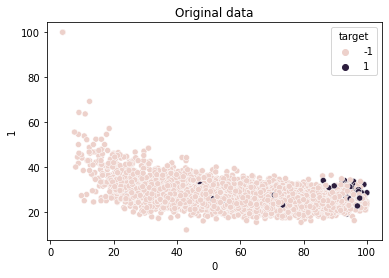

In [24]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

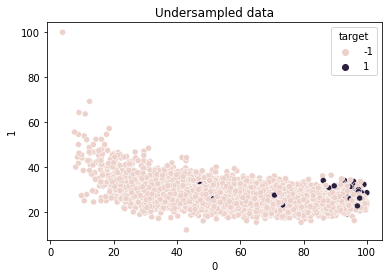

In [25]:
# undersampled data

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

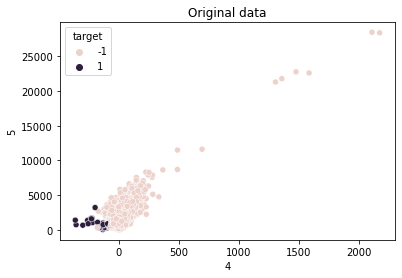

In [26]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

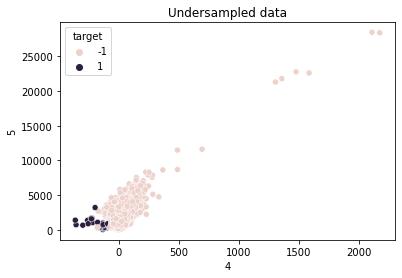

In [27]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## Machine learning performance comparison

Let's compare model performance with and without undersampling.

In [28]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [29]:
# evaluate performance of algorithm built
# using imbalanced dataset

run_randomForests(X_train,
                  X_test,
                  y_train,
                  y_test)

Train set
Random Forests roc-auc: 0.9969960286480432
Test set
Random Forests roc-auc: 0.9688281099788503


In [30]:
# evaluate performance of algorithm built
# using undersampled dataset

run_randomForests(X_resampled,
                  X_test,
                  y_resampled,
                  y_test)

Train set
Random Forests roc-auc: 0.9982419187715514
Test set
Random Forests roc-auc: 0.9560060565275909


Removing Tomek Links did not seem to improve performance.

**HOMEWORK**

- Try removing both members of the Tomek Link. Compare final dataset size, model performance and the distributions of the observations before and after the undersampling.